# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

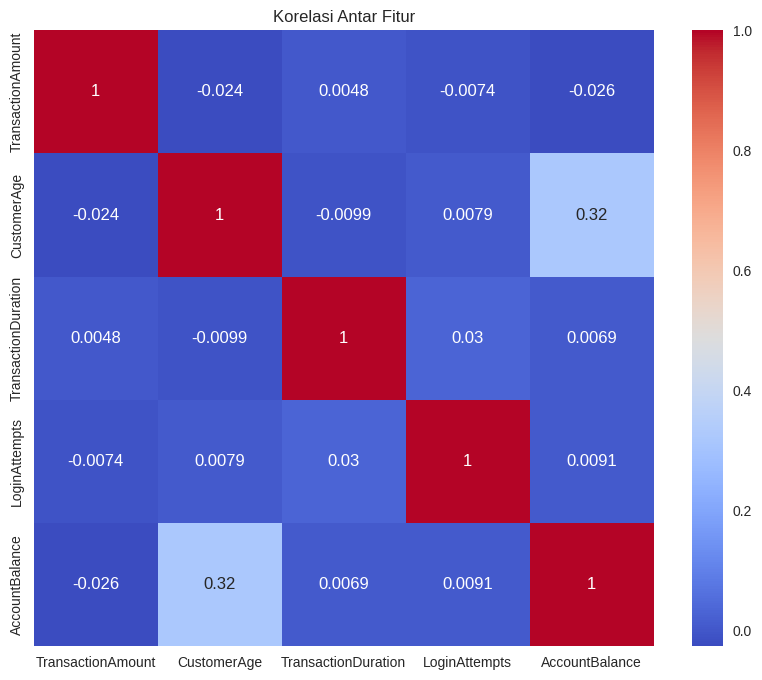

In [6]:
subset = df.select_dtypes(include="float64")

corr_metrix = subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_metrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

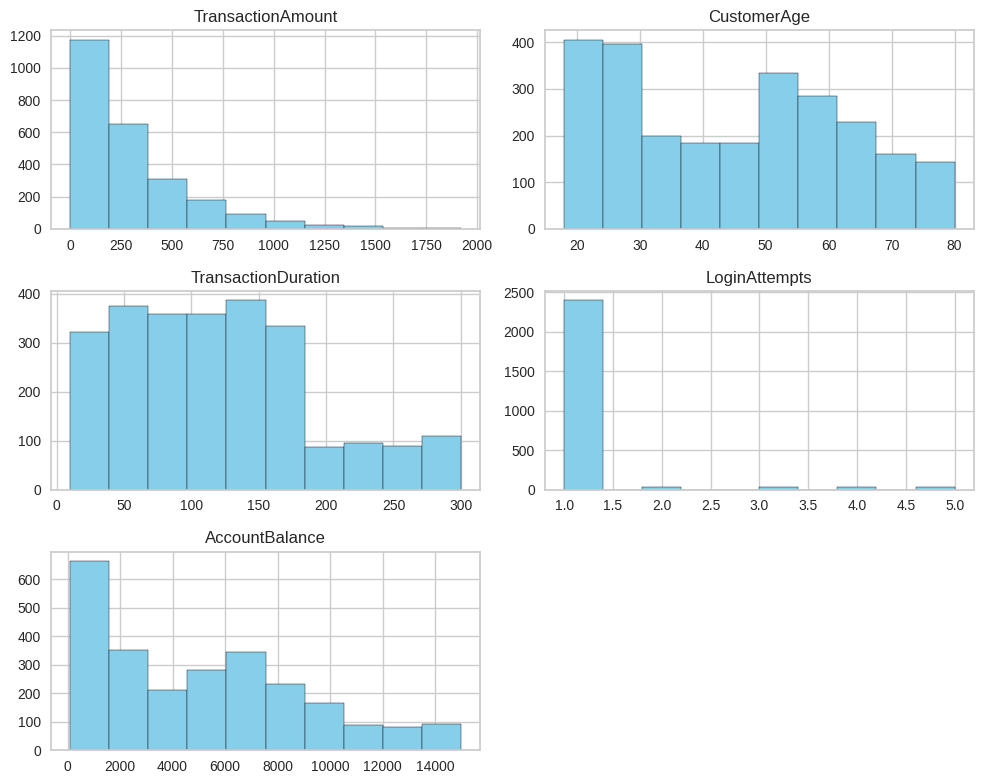

In [7]:
subset = df.select_dtypes(include="float64")

subset.hist(bins=10, figsize=(10, 8), color="skyblue", edgecolor="black")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

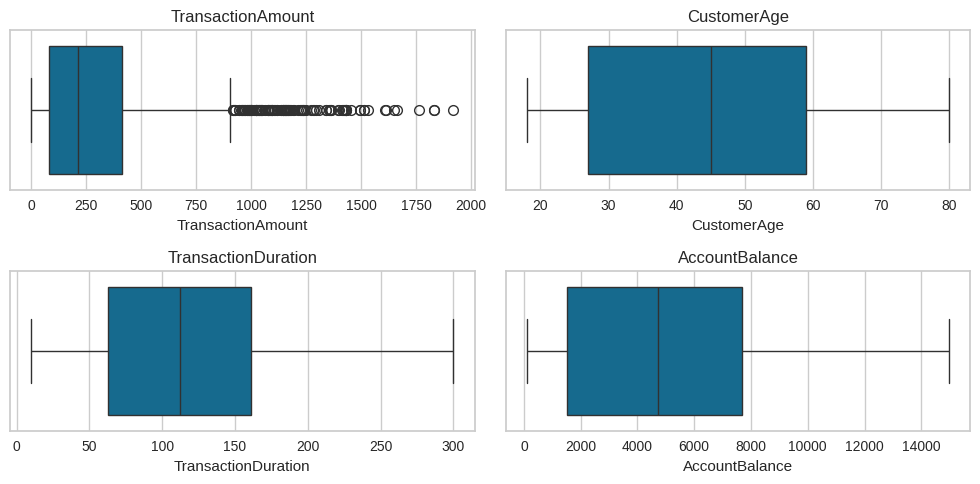

In [8]:
columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

for col, ax in zip(columns, axs.flatten()):
  sns.boxplot(x = df[col], ax = ax)
  ax.set_title(col)



plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


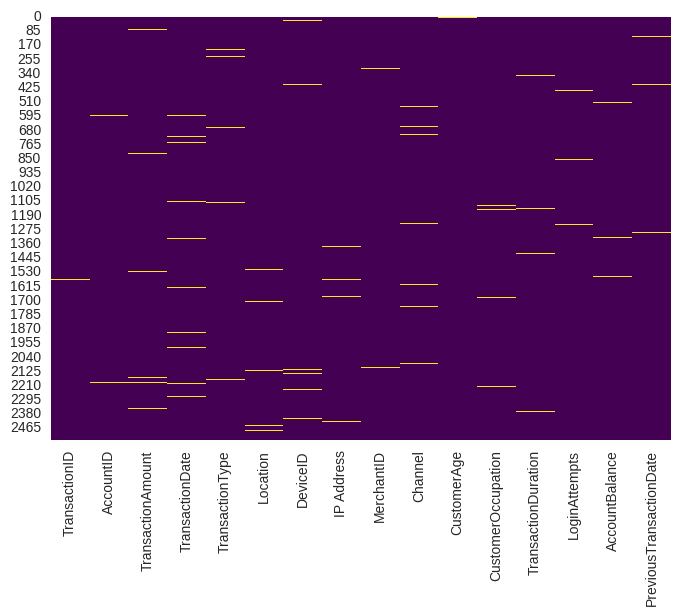

In [10]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [11]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df_drop = df.drop(['TransactionID', 'TransactionDate', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address', 'PreviousTransactionDate'], axis=1)

df_drop.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
4,13.45,Credit,Atlanta,Online,NaN,Student,198.0,1.0,7429.40


In [13]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df_scaling = df_drop.copy()
numerical_cols = df_scaling.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_scaling[numerical_cols] = scaler.fit_transform(df_scaling[numerical_cols])

df_scaling.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [14]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
encoder = LabelEncoder()

df_encoding = df_scaling.copy()

df_encoding['TransactionType'] = encoder.fit_transform(df_encoding['TransactionType'])
df_encoding['Location'] = encoder.fit_transform(df_encoding['Location'])
df_encoding['Channel'] = encoder.fit_transform(df_encoding['Channel'])
df_encoding['CustomerOccupation'] = encoder.fit_transform(df_encoding['CustomerOccupation'])

df_encoding.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [15]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_encoding.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

In [16]:
#Before Handling missing value
df_encoding.isna().sum()

,0
TransactionAmount,26
TransactionType,0
Location,0
Channel,0
CustomerAge,18
CustomerOccupation,0
TransactionDuration,26
LoginAttempts,21
AccountBalance,27


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [17]:
df_encoding.dropna(inplace=True)

In [18]:
df_encoding.drop_duplicates(inplace=True)

In [19]:
#After handling missing value
df_encoding.isna().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [20]:
z_scores = np.abs(stats.zscore(df_encoding))
threshold = 3
df_clean = df_encoding[(z_scores < threshold).all(axis=1)]

In [21]:
'''
df_clean['TransactionAmount'] = pd.qcut(df_clean['TransactionAmount'], q=3, labels=['Sedikit', 'Sedang', 'Banyak'])
df_clean['CustomerAge'] = pd.qcut(df_clean['CustomerAge'], q=3, labels=['Remaja', 'Dewasa', 'Lansia'])
df_clean['TransactionDuration'] = pd.qcut(df_clean['TransactionDuration'], q=2, labels=['Normal', 'Cepat'])
df_clean['AccountBalance'] = pd.qcut(df_clean['AccountBalance'], q=3, labels=['Sedikit', 'Sedang', 'Banyak'])

le = LabelEncoder()

df_clean['TransactionAmount'] = le.fit_transform(df_clean['TransactionAmount'])
df_clean['CustomerAge'] = le.fit_transform(df_clean['CustomerAge'])
df_clean['TransactionDuration'] = le.fit_transform(df_clean['TransactionDuration'])
df_clean['AccountBalance'] = le.fit_transform(df_clean['AccountBalance'])
df_clean.head()
'''

/tmp/ipython-input-328544443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TransactionAmount'] = pd.qcut(df_clean['TransactionAmount'], q=3, labels=['Sedikit', 'Sedang', 'Banyak'])
/tmp/ipython-input-328544443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CustomerAge'] = pd.qcut(df_clean['CustomerAge'], q=3, labels=['Remaja', 'Dewasa', 'Lansia'])
/tmp/ipython-input-328544443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,2,1,36,0,1,0,1,0.0,1
1,0,1,15,0,1,0,0,0.0,0
2,1,1,23,2,2,3,1,0.0,2
3,1,1,33,2,2,3,1,0.0,0
5,2,1,28,0,2,3,0,0.0,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [21]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_clean.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000
mean,0.144326,0.790380,21.400265,1.011915,0.431106,1.529568,0.375497,0.002758,0.335349
std,0.129897,0.438455,12.435830,0.830617,0.287059,1.152120,0.241844,0.026120,0.261372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041468,1.000000,11.000000,0.000000,0.145161,0.000000,0.179310,0.000000,0.093694
50%,0.108291,1.000000,21.000000,1.000000,0.435484,2.000000,0.348276,0.000000,0.309385
75%,0.204094,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.505868
max,0.609391,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.250000,1.000000


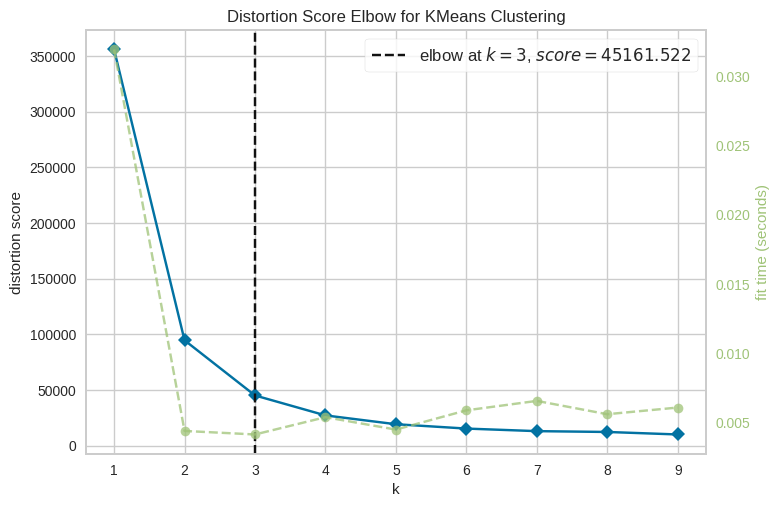

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
df_elbow = df_clean.copy()

model = KMeans(random_state = 42)
Visualizer = KElbowVisualizer(model, k = (1, 10))

Visualizer.fit(df_elbow)
Visualizer.show()

In [23]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(df_clean)

print(df_clean)

      TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              0.007207                1        36        0     0.838710   
1              0.195940                1        15        0     0.806452   
2              0.065680                1        23        2     0.016129   
3              0.096016                1        33        2     0.129032   
5              0.047888                1        28        0     0.000000   
...                 ...              ...       ...      ...          ...   
2509           0.014785                1        36        1     0.612903   
2510           0.096782                1        10        2     0.080645   
2511           0.126545                0        17        2     0.096774   
2523           0.006212                1        27        1     0.935484   
2524           0.120833                1        29        0     0.306452   

      CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0      

/tmp/ipython-input-385301353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.fit_predict(df_clean)


Jalankan cell code ini untuk menyimpan model kamu.

In [24]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "../results/model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [25]:
score = silhouette_score(df_elbow, df_clean['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.5428420454862625


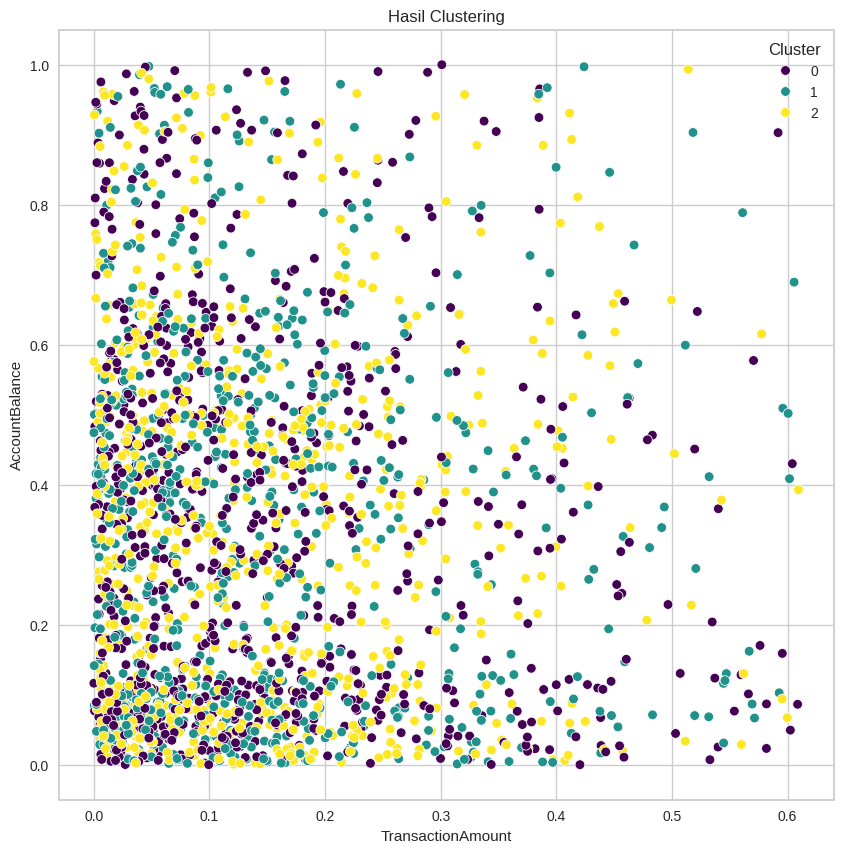

In [27]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_clean, x='TransactionAmount', y='AccountBalance', hue='Cluster', palette='viridis')
plt.title('Hasil Clustering')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
pca =PCA(n_components=5)
df_pca = pca.fit_transform(df_clean)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_final = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
model = KMeans(n_clusters=3)
model.fit(df_final)

KMeans(n_clusters=3)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
import joblib
joblib.dump(model, "../results/PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

df_des = pd.DataFrame(df_clean)

agg_func = ['mean', 'min', 'max']

df_agg = df_des.select_dtypes(include='number').agg(agg_func)

df_agg

df_group = df_des.groupby('Cluster').agg(agg_func)

df_group

TransactionAmount         TransactionType           Location          \
                     mean min max            mean min max       mean min max   
Cluster                                                                        
0                0.988903   0   2        0.781751   0   2  23.124538  16  30   
1                1.008547   0   2        0.813187   0   2   7.650794   0  15   
2                1.003145   0   2        0.772013   0   2  36.907233  31  43   

          Channel  ... CustomerOccupation TransactionDuration          \
             mean  ...                max                mean min max   
Cluster            ...                                                  
0        1.003699  ...                  4            0.498150   0   1   
1        1.001221  ...                  4            0.495726   0   1   
2        1.036164  ...                  4            0.517296   0   1   

        LoginAttempts            AccountBalance          
                 mean  min   max           mean min max  
Cluster                                                  
0            0.004007  0.0  0.25       0.985203   0   2  
1            0.003053  0.0  0.25       1.000000   0   2  
2            0.000786  0.0  0.25       1.017296   0   2  

[3 rows x 27 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Transaksi sedang dan akun balance sedang)**:
  - **Rata-rata (mean) TransactionAmount:** 0.988903 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 0.985203 <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini cenderung memiliki rata-rata nilai transaksi dan saldo akun yang berada pada rentang sedang. Ini bisa mengindikasikan nasabah dengan aktivitas transaksi yang rutin namun tidak terlalu besar.
2. **Cluster 1: (Nasabah dengan Transaksi Rendah dan Akun Balance Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** 1.008547 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 1.000000 <Sebelum inverse> <Setelah inverse>
  - **Analisis:**  Cluster ini menunjukkan rata-rata nilai transaksi dan saldo akun yang lebih rendah dibandingkan cluster lainnya. Ini mungkin mencakup nasabah dengan aktivitas transaksi yang minim atau saldo akun yang lebih kecil.
3. **Cluster 2: (Nasabah dengan Transaksi Tinggi dan Akun Balance Tinggi)**:
  - **Rata-rata (mean) TransactionAmount:** 1.003145 <Sebelum inverse> <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 1.017296 <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini terdiri dari nasabah dengan rata-rata nilai transaksi dan saldo akun yang tinggi. Mereka kemungkinan adalah nasabah yang aktif bertransaksi dengan jumlah besar dan memiliki saldo akun yang signifikan.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_clean = df_clean.rename(columns={'Cluster': 'Target'})

In [ ]:
# Simpan Data
df_clean.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
df_scaling_inverse = df_scaling.copy()
df_scaling_inverse[numerical_cols] = scaler.inverse_transform(df_scaling_inverse[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df_scaling_inverse.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
categorical_cols_encoded = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoders = {}

for col in categorical_cols_encoded:
    encoders[col] = LabelEncoder()
    encoders[col].fit(df[col].astype(str))

df_inverse_encoded = df_encoding.copy()

for col in categorical_cols_encoded:
    df_inverse_encoded[col] = encoders[col].inverse_transform(df_inverse_encoded[col].astype(int))

df_inverse_encoded.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
5,0.047888,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045738


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

df_des = pd.DataFrame(df_inverse_encoded)

agg_func = ['mean', 'min', 'max']

df_num = df_des.select_dtypes(include='number').agg(agg_func)

df_num

df_category = df_des.select_dtypes(include='object').mode()

df_category

df = pd.concat([df_num, df_category], axis=1)

df

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
mean,0.154944,0.429441,0.377573,0.030038,0.335439,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,Debit,Charlotte,Branch,Student
1,NaN,NaN,NaN,NaN,NaN,NaN,Oklahoma City,NaN,NaN


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

df_scaling = df_scaling_inverse.reset_index(drop = True)
df_encoding = df_inverse_encoded.reset_index(drop = True)
df_cluster = df_clean['Target'].reset_index(drop = True).to_frame()

df_inverse = pd.concat([df_scaling, df_encoding, df_cluster], axis=1)

df_inverse.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,1.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,0.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,0.047888,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045738,0.0


In [ ]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.